In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
# 读取图像，并将图像转化为灰度
image = mpimg.imread('test.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

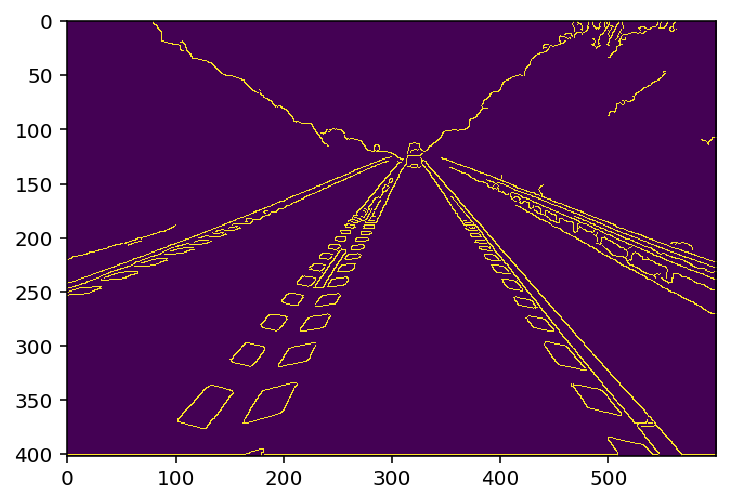

In [3]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges)

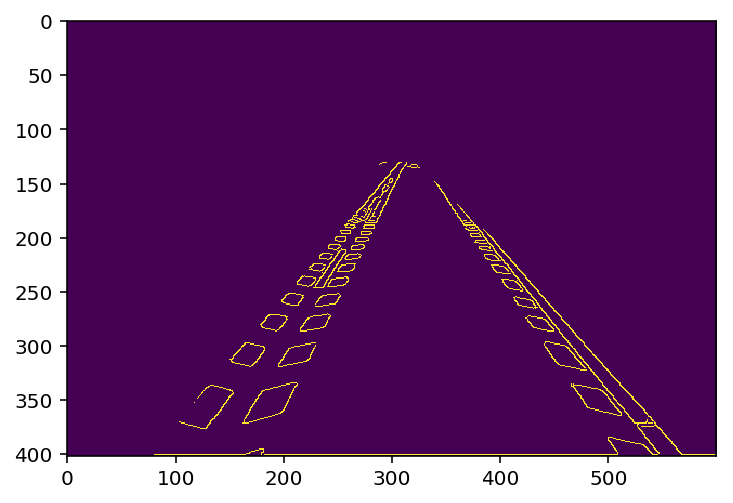

In [4]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(gray)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[[80,400],[290,130],[320,130], [600,400]]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges)

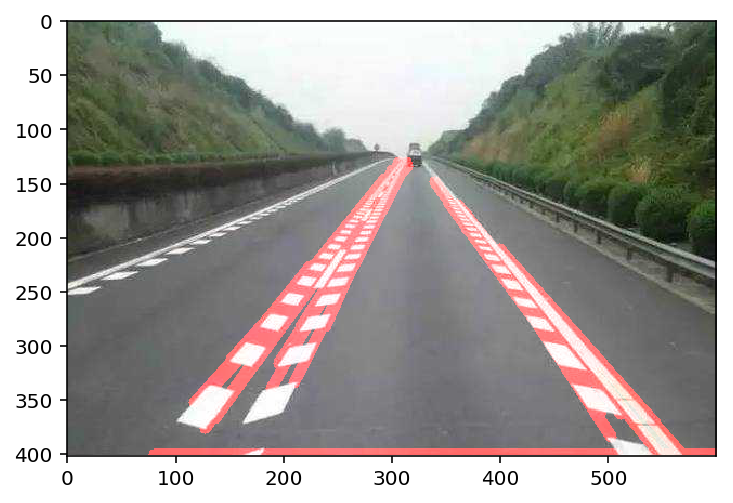

In [9]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 6 # distance resolution in pixels of the Hough grid
theta = np.pi/60 # angular resolution in radians of the Hough grid
threshold = 160     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40#minimum number of pixels making up a line
max_line_gap = 25    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 


# Draw the lines on the edge image
#lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
lines_edges = cv2.addWeighted(image, 1, line_image, 0.8, 0) 
plt.imshow(lines_edges)

HoughLinesP原函数：

功能：将输入图像按照给出参数要求提取线段，放在lines中。

lines:是一个vector<Vec4i>,Vec4i是一个包含4个int数据类型的结构体，[x1,y1,x2,y2],可以表示一个线段。

rho:就是一个半径的分辨率。

theta:角度分辨率。

threshold:判断直线点数的阈值。

minLineLength：线段长度阈值。

minLineGap:线段上最近两点之间的阈值。

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
必要参数：
第一个参数是需要处理的原图像，该图像必须为单通道的灰度图；
第二个参数是阈值1；
第三个参数是阈值2。
建议选取参数为１：３或者１：２

In [ ]:
cv2.fillPoly 和 cv2.fillConvexPoly：非凸任意形状填充和凸填充


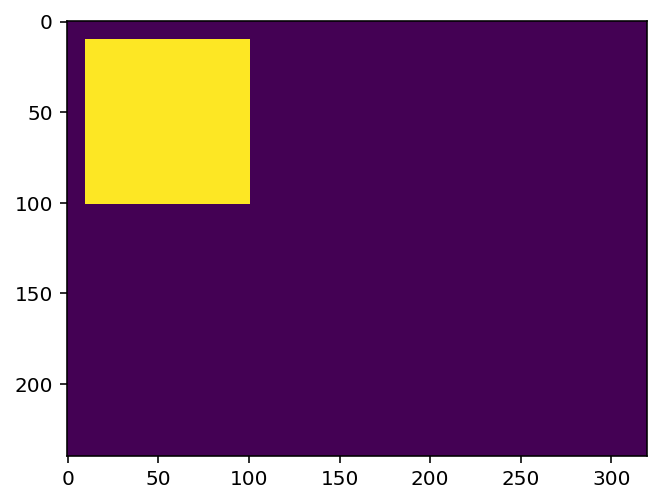

In [7]:
a3 = np.array( [[[10,10],[100,10],[100,100],[10,100]]], dtype=np.int32 )
im = np.zeros([240,320],dtype=np.uint8)
cv2.fillPoly( im, a3, 255 )
cv2.bitwise_and(im, mask)
plt.imshow(im)
plt.show()

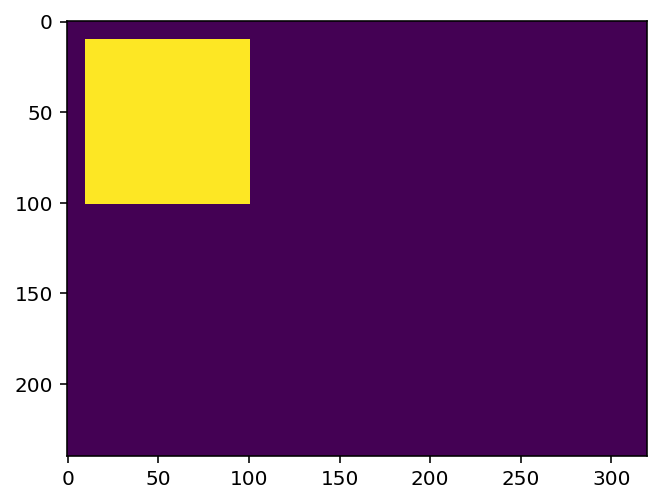

In [9]:
a4 = np.array( [[[10,10],[100,10],[100,100],[10,100]]], dtype=np.int32 )
im2 = np.zeros([240,320],dtype=np.uint8)
cv2.fillConvexPoly( im2, a4, 255 )

plt.imshow(im)
plt.show()

#### numpy的poly1d()函数
如果f(x) = 2x＾２ +x +1

In [3]:
p = np.poly1d([2, 1, 1])

In [4]:
p(0.5)

2.0

In [5]:
p

poly1d([2, 1, 1])

In [6]:
p.r#求多项式的跟

array([-0.25+0.66143783j, -0.25-0.66143783j])

In [7]:
p.c

array([2, 1, 1])

#### numpy的polyfit()函数

In [8]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])

In [9]:
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

In [10]:
z = np.polyfit(x, y, 3)

In [11]:
z

array([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [12]:
p = np.poly1d(z)

In [13]:
p

poly1d([ 0.08703704, -0.81349206,  1.69312169, -0.03968254])

In [14]:
p(0.5)

0.6143849206349192